# <font color = Blue> Aim: To Predict Monthly House Rent in Mumbai City with given Data. </font>

## <font color = Blue> Approch: </font>
- Import Dataset and have a very Quick look.
- Analyze and Clean Data. Look into each and every feature and make them clean for use.
- Remove Outliers and exception data by visualizing features.
- Visualize and have a look how features related with monthly rent.
- Prepare and Scale Data for Machine learning model.
- Try Different ML models and calculate their accuracy scores.
- Select best model.


<a id = 'top'></a>
## <font color = Blue> Table of Contents: </font>
- <a href = '#s1'> 1. Importing Data and required packages. </a>
- <a href = '#s2'> 2. Data Analyzing and Wranggling. </a>
- <a href = '#s3'> 3. Data Visualization and Removing Outliers/Exceptions. </a>
- <a href = '#s4'> 4. OneHotEncoding Text features.  </a>
- <a href = '#s5'> 5. Machine Learning Model Building. </a>

## <a href = '#s6'> <font color = Red> Conclusion </font> </a>

<a id = 's1'></a>
# <font color = Blue> 1. Importing Data and required packages. </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                                             # only to ignore python warnings
warnings.simplefilter("ignore")

In [2]:
data1 = pd.read_csv('Mumbai_99acers.csv')
data1.head(3)

,sl no.,society,type,location,lattitude,longitude,bedrooms,built-up area,furnishing,age,...,dealer,posted,monthly rent,property photo,property video,society photo,society video,locality photo,locality video,description
0,1,Bandstand Apartment,Residential Apartment,Bandra (West),19.047353,72.820068,2 BHK,800.0,Furnished,5 to 10 years old,...,PROPBAY,Jul-05-2018,85000,2,0,3,0,0,0,Description : 2 bhk apartment for rent in band...
1,2,Fantastic Apartment,Residential Apartment,Khar West,19.071690,72.834127,2 BHK,1050.0,Furnished,1 to 5 years old,...,PROPBAY,Jul-05-2018,110000,0,0,0,0,1,0,Description : 2 bhk apartment for rent in khar...
2,3,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,19.109368,73.001346,2 BHK,1050.0,Unfurnished,1 to 5 years old,...,AAKASH REAL ESTATE,Jul-07-2018,32000,0,0,0,1,0,0,Description : 2 bhk flat available for rent in...


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13541 entries, 0 to 13540
Data columns (total 22 columns):
sl no.            13541 non-null int64
society           13541 non-null object
type              13541 non-null object
location          13541 non-null object
lattitude         2174 non-null float64
longitude         2174 non-null float64
bedrooms          13541 non-null object
built-up area     13541 non-null float64
furnishing        13541 non-null object
age               13541 non-null object
floor             13541 non-null object
total floors      13541 non-null object
dealer            13478 non-null object
posted            13541 non-null object
monthly rent      13541 non-null int64
property photo    13541 non-null int64
property video    13541 non-null int64
society photo     13541 non-null int64
society video     13541 non-null int64
locality photo    13541 non-null int64
locality video    13541 non-null int64
description       13541 non-null object
dtypes: float64(3)

<a id = 's2'></a>
## <font color = Blue> 2. Data Analyzing and Wranggling. </font>
<a href = '#top'>Back on Top</a>

###  Dropping useless features. (In my view, as per requirements) 

In [4]:
data2 = data1.drop(data1.iloc[:,[0,4,5,12,13,15,16,17,18,19,20,21]],axis = 1)
data2.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,Bandstand Apartment,Residential Apartment,Bandra (West),2 BHK,800.0,Furnished,5 to 10 years old,2nd,6,85000
1,Fantastic Apartment,Residential Apartment,Khar West,2 BHK,1050.0,Furnished,1 to 5 years old,8th,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2 BHK,1050.0,Unfurnished,1 to 5 years old,14th,17,32000
3,Crescent Bay,Residential Apartment,Parel,3 BHK,2275.0,Semifurnished,1 to 5 years old,40th,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1 BHK,550.0,Semifurnished,5 to 10 years old,4th,7,27000


In [5]:
data2.isnull().sum()

society          0
type             0
location         0
bedrooms         0
built-up area    0
furnishing       0
age              0
floor            0
total floors     0
monthly rent     0
dtype: int64

In [6]:
data2.dtypes

society           object
type              object
location          object
bedrooms          object
built-up area    float64
furnishing        object
age               object
floor             object
total floors      object
monthly rent       int64
dtype: object

## Removing useless spaces from numeric columns, just in case if they have. 

In [7]:
for i in data2.columns.drop(['built-up area','monthly rent']):
    data2[i] = data2[i].apply(lambda x: x.strip())

In [8]:
data2.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,Bandstand Apartment,Residential Apartment,Bandra (West),2 BHK,800.0,Furnished,5 to 10 years old,2nd,6,85000
1,Fantastic Apartment,Residential Apartment,Khar West,2 BHK,1050.0,Furnished,1 to 5 years old,8th,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2 BHK,1050.0,Unfurnished,1 to 5 years old,14th,17,32000
3,Crescent Bay,Residential Apartment,Parel,3 BHK,2275.0,Semifurnished,1 to 5 years old,40th,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1 BHK,550.0,Semifurnished,5 to 10 years old,4th,7,27000


In [9]:
data3 = data2.copy()

## Merging societies having count less than 10. only to simplify our model.

In [10]:
society_count = pd.DataFrame(data3['society'].value_counts())
society_count

,society
On Request,1219
Lodha New Cuffe Parade,279
Lodha Lakeshore Greens,186
Crescent Bay,162
Ajmera Bhakti Park Sector 1 and 2,160
...,...
Gardenia Chs Ltd,1
Shree Sawan Elegance,1
"Devdaya Nagar Phase 1, Pokhran-2, Mumbai Thane",1
"Khar West,lane Of Gabbana Show Room 15th Road",1


In [11]:
society_count_less_than_10_index_list = society_count[society_count['society']<10].index

In [12]:
society_count_less_than_10_index_list

Index(['K Raheja Maple Leaf CHS', 'Ace Aviana', 'Raheja Height chs ltd',
       'Ajmera I land', 'DSS Mahavir Classik', 'GHP Powai Vihar Complex',
       'Omkar 1973 Worli', 'Ajmera Himalayan Heights',
       'Mahindra Great Eastern Gardens', 'Omkar Meridia',
       ...
       'SCN Society', 'Shubharambh Towers', 'Shirin Apartment',
       'Samartha Aangan', 'Minarette Condominiums', 'Gardenia Chs Ltd',
       'Shree Sawan Elegance',
       'Devdaya Nagar Phase 1, Pokhran-2, Mumbai Thane',
       'Khar West,lane Of Gabbana Show Room 15th Road',
       'Radhekrishna Complex'],
      dtype='object', length=3292)

In [13]:
data3['society'] = data3['society'].apply(lambda x: 'other society' if x in society_count_less_than_10_index_list else x)

In [14]:
data3['society'].value_counts()

other society                                5554
On Request                                   1219
Lodha New Cuffe Parade                        279
Lodha Lakeshore Greens                        186
Crescent Bay                                  162
                                             ... 
Bhoomi Park                                    10
Kesar Harmony                                  10
Hiranandani Estate, Patlipada, Thane West      10
Emgee Greens                                   10
Oberoi Parkview                                10
Name: society, Length: 182, dtype: int64

## Making floor and total floors = 0 for Independent House/Villa

In [15]:
data3['type'].value_counts()

Residential Apartment      13416
Studio Apartment              69
Independent House/Villa       56
Name: type, dtype: int64

In [16]:
data3[data3['type'] == 'Independent House/Villa']

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1360,Union Park,Independent House/Villa,Chembur,2 Bedroom,935.0000,Unfurnished,1 to 5 years old,Not Mentioned,Not Mentioned,44000
1606,other society,Independent House/Villa,Lokhandwala,4 Bedroom,2500.0000,Semifurnished,5 to 10 years old,Not Mentioned,Not Mentioned,250000
1646,other society,Independent House/Villa,Worli Naka,4 Bedroom,41548.6540,Semifurnished,0 to 1 years old,Not Mentioned,Not Mentioned,310000
1788,Description :,Independent House/Villa,Juhu,4 Bedroom,3500.0000,Not Mentioned,5 to 10 years old,Not Mentioned,Not Mentioned,400000
1901,On Request,Independent House/Villa,Sector-8 Charkop,1 Bedroom,250.0000,Unfurnished,10+ years old,Not Mentioned,Not Mentioned,10500
2122,On Request,Independent House/Villa,Juhu,4 Bedroom,3300.0000,Furnished,5 to 10 years old,Not Mentioned,Not Mentioned,450000
2124,other society,Independent House/Villa,Sector-2 Airoli,1 Bedroom,269.0975,Unfurnished,0 to 1 years old,Not Mentioned,Not Mentioned,7500
2175,other society,Independent House/Villa,Sector 12 Vashi,4 Bedroom,3229.1700,Semifurnished,1 to 5 years old,Not Mentioned,Not Mentioned,125000
2340,other society,Independent House/Villa,Chembur,4 Bedroom,2500.0000,Furnished,1 to 5 years old,Not Mentioned,Not Mentioned,84000
2377,Description :,Independent House/Villa,Kharghar,2 Bedroom,4520.8380,Not Mentioned,10+ years old,Not Mentioned,Not Mentioned,25000


In [17]:
type_index_list = data3[data3['type'] == 'Independent House/Villa'].index
type_index_list

Int64Index([ 1360,  1606,  1646,  1788,  1901,  2122,  2124,  2175,  2340,
             2377,  2391,  5638,  5726,  5865,  5915,  6106,  6659,  6934,
             6979,  6987,  7101,  7574,  7702,  7883,  7928,  7933,  7934,
             7942,  8008,  8153,  8428,  8762,  8921,  9023,  9430,  9715,
             9736, 10049, 10262, 10293, 10409, 10410, 10433, 10595, 10846,
            10847, 11045, 11063, 11373, 11671, 11864, 11888, 12033, 12142,
            12469, 13513],
           dtype='int64')

In [18]:
for i in type_index_list:
    data3['floor'][i] = 0
    data3['total floors'][i] = 0

In [19]:
data3[data3['type'] == 'Independent House/Villa']

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1360,Union Park,Independent House/Villa,Chembur,2 Bedroom,935.0000,Unfurnished,1 to 5 years old,0,0,44000
1606,other society,Independent House/Villa,Lokhandwala,4 Bedroom,2500.0000,Semifurnished,5 to 10 years old,0,0,250000
1646,other society,Independent House/Villa,Worli Naka,4 Bedroom,41548.6540,Semifurnished,0 to 1 years old,0,0,310000
1788,Description :,Independent House/Villa,Juhu,4 Bedroom,3500.0000,Not Mentioned,5 to 10 years old,0,0,400000
1901,On Request,Independent House/Villa,Sector-8 Charkop,1 Bedroom,250.0000,Unfurnished,10+ years old,0,0,10500
2122,On Request,Independent House/Villa,Juhu,4 Bedroom,3300.0000,Furnished,5 to 10 years old,0,0,450000
2124,other society,Independent House/Villa,Sector-2 Airoli,1 Bedroom,269.0975,Unfurnished,0 to 1 years old,0,0,7500
2175,other society,Independent House/Villa,Sector 12 Vashi,4 Bedroom,3229.1700,Semifurnished,1 to 5 years old,0,0,125000
2340,other society,Independent House/Villa,Chembur,4 Bedroom,2500.0000,Furnished,1 to 5 years old,0,0,84000
2377,Description :,Independent House/Villa,Kharghar,2 Bedroom,4520.8380,Not Mentioned,10+ years old,0,0,25000


## Merging locations having count less than 10. only to simplify our model.

In [20]:
location_count = pd.DataFrame(data3['location'].value_counts())
location_count

,location
Bandra (West),571
Wadala,497
Hiranandani Gardens - Powai,463
Wadala East,458
Chembur (East),449
...,...
Sector-18 Sanpada,1
Swastik Park,1
Manisha Nagar,1
Sector-12 Kopar Khairane,1


In [21]:
location_count_less_than_10_index = location_count[location_count['location']<10].index
location_count_less_than_10_index

Index(['Old Panvel', 'Sector-9 Sanpada', 'Sector-20 Roadpali',
       'Sector 5 Ghansoli', 'Vartak Nagar', 'Nerul', 'Mahakali Caves',
       'Bandra Kurla Complex', 'Ghatkopar (East)', 'Hanuman Nagar',
       ...
       'Lalbaug', 'Chamundeshwari Nagar', 'Nariman Point',
       'Sector 34C Kharghar', 'Gauripada', 'Sector-18 Sanpada', 'Swastik Park',
       'Manisha Nagar', 'Sector-12 Kopar Khairane', 'Usarli Khurd'],
      dtype='object', length=367)

In [22]:
data3['location'] = data3['location'].apply(lambda x: 'other location' if x in location_count_less_than_10_index else x)

In [23]:
data3['location'].value_counts()

other location                 1003
Bandra (West)                   571
Wadala                          497
Hiranandani Gardens - Powai     463
Wadala East                     458
                               ... 
Chakala                          11
4 Bunglows                       10
Sindhi Society Chembur           10
Sector-6 Nerul                   10
Dindoshi                         10
Name: location, Length: 166, dtype: int64

## Extracting only numerals from bedrooms column.

In [24]:
data3['bedrooms'].value_counts()

2 BHK        6392
3 BHK        3447
1 BHK        2906
4 BHK         620
1 RK           69
5 BHK          46
4 Bedroom      22
1 Bedroom      12
2 Bedroom       8
3 Bedroom       7
6 BHK           5
5 Bedroom       4
7 Bedroom       2
9 Bedroom       1
Name: bedrooms, dtype: int64

In [25]:
data3['bedrooms'] = data3['bedrooms'].apply(lambda x: x.strip(' ')[0])

In [26]:
data3['bedrooms'].value_counts()

2    6400
3    3454
1    2987
4     642
5      50
6       5
7       2
9       1
Name: bedrooms, dtype: int64

## Droping 'Not Mentioned'  from furnishing and age columns.

In [27]:
data3['furnishing'].value_counts()

Semifurnished    5661
Unfurnished      4272
Furnished        3395
Not Mentioned     213
Name: furnishing, dtype: int64

In [28]:
data4 = data3.replace({'furnishing':'Not Mentioned' }, np.NaN)
data4.isnull().sum()

society            0
type               0
location           0
bedrooms           0
built-up area      0
furnishing       213
age                0
floor              0
total floors       0
monthly rent       0
dtype: int64

In [29]:
data5 = data4.dropna()
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13328 entries, 0 to 13540
Data columns (total 10 columns):
society          13328 non-null object
type             13328 non-null object
location         13328 non-null object
bedrooms         13328 non-null object
built-up area    13328 non-null float64
furnishing       13328 non-null object
age              13328 non-null object
floor            13328 non-null object
total floors     13328 non-null object
monthly rent     13328 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [30]:
data5['age'].value_counts()

1 to 5 years old     4750
5 to 10 years old    3969
0 to 1 years old     2649
10+ years old        1956
Not Mentioned           4
Name: age, dtype: int64

In [31]:
data5 = data5.replace({'age': 'Not Mentioned'}, np.NaN)

In [32]:
data5['age'].value_counts()

1 to 5 years old     4750
5 to 10 years old    3969
0 to 1 years old     2649
10+ years old        1956
Name: age, dtype: int64

## Cleaning floor column

In [33]:
data5['floor'].value_counts()

5th              1315
4th              1181
3rd              1174
6th              1063
2nd               994
7th               833
1st               659
12th              644
8th               639
10th              631
11th              532
9th               469
14th              379
16th              316
15th              306
20th              247
19th              228
13th              203
18th              193
17th              155
Ground            109
22nd              104
24th              102
25th               98
21st               78
40th               72
23rd               62
27th               55
26th               45
28th               45
0                  43
ried               42
35th               36
40+                36
34th               36
30th               35
29th               30
Not Mentioned      29
36th               24
32nd               22
33rd               18
38th               15
31st               13
39th               11
37th                7
Name: floo

In [34]:
data6 = data5.replace({'floor': ['Ground','ried']}, 0)
data6.replace({'floor': '40+'},41, inplace =True)
data6.replace({'floor': 'Not Mentioned'}, np.NaN, inplace =True)

In [35]:
data6['floor'].value_counts()

5th     1315
4th     1181
3rd     1174
6th     1063
2nd      994
7th      833
1st      659
12th     644
8th      639
10th     631
11th     532
9th      469
14th     379
16th     316
15th     306
20th     247
19th     228
13th     203
0        194
18th     193
17th     155
22nd     104
24th     102
25th      98
21st      78
40th      72
23rd      62
27th      55
28th      45
26th      45
35th      36
34th      36
41        36
30th      35
29th      30
36th      24
32nd      22
33rd      18
38th      15
31st      13
39th      11
37th       7
Name: floor, dtype: int64

In [36]:
data7 = data6.replace({'floor': '[A-Za-z]'}, ' ', regex = True)
data7['floor'] = data7['floor'].astype(str)
data7['floor'] = data7['floor'].apply(lambda x: x.strip())
data7.dtypes

society           object
type              object
location          object
bedrooms          object
built-up area    float64
furnishing        object
age               object
floor             object
total floors      object
monthly rent       int64
dtype: object

In [37]:
data7.floor.value_counts()

5      1315
4      1181
3      1174
6      1063
2       994
7       833
1       659
12      644
8       639
10      631
11      532
9       469
14      379
16      316
15      306
20      247
19      228
13      203
0       194
18      193
17      155
22      104
24      102
25       98
21       78
40       72
23       62
27       55
28       45
26       45
35       36
34       36
41       36
30       35
29       30
nan      29
36       24
32       22
33       18
38       15
31       13
39       11
37        7
Name: floor, dtype: int64

In [38]:
data7.replace({'floor': 'nan'}, 0, inplace = True)

In [39]:
data7.isnull().sum()

society          0
type             0
location         0
bedrooms         0
built-up area    0
furnishing       0
age              4
floor            0
total floors     0
monthly rent     0
dtype: int64

In [40]:
data8 = data7.dropna()
data8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13324 entries, 0 to 13540
Data columns (total 10 columns):
society          13324 non-null object
type             13324 non-null object
location         13324 non-null object
bedrooms         13324 non-null object
built-up area    13324 non-null float64
furnishing       13324 non-null object
age              13324 non-null object
floor            13324 non-null object
total floors     13324 non-null object
monthly rent     13324 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [41]:
data8['total floors'].unique()

array(['6', '12', '17', '41', '7', '19', '30', '23', '24', '8', '18', '4',
       '11', '14', '22', '10', '3', '39', '35', '20', '21', '40', '13',
       '15', '32', '33', '36', '16', '5', '37', '38', '27',
       'Not Mentioned', '9', '26', '25', '28', 0, '34', '29', '59', '46',
       '31', '2', '45', '48', '42', '1', '60', '55', '52', '58'],
      dtype=object)

In [42]:
(data8['total floors'] == 'Not Mentioned').sum()

11

In [43]:
data8.replace({'total floors': 'Not Mentioned'}, np.NaN, inplace = True)

In [44]:
data9 = data8.dropna()
data9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13313 entries, 0 to 13540
Data columns (total 10 columns):
society          13313 non-null object
type             13313 non-null object
location         13313 non-null object
bedrooms         13313 non-null object
built-up area    13313 non-null float64
furnishing       13313 non-null object
age              13313 non-null object
floor            13313 non-null object
total floors     13313 non-null object
monthly rent     13313 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


## At last convert all columns contains numerals into integer datatype

In [45]:
data9['bedrooms'] = data9['bedrooms'].astype(int)
data9['floor'] = data9['floor'].astype(int)
data9['total floors'] = data9['total floors'].astype(int)

In [46]:
data9.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,85000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,32000
3,Crescent Bay,Residential Apartment,Parel,3,2275.0,Semifurnished,1 to 5 years old,40,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1,550.0,Semifurnished,5 to 10 years old,4,7,27000


In [47]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13313 entries, 0 to 13540
Data columns (total 10 columns):
society          13313 non-null object
type             13313 non-null object
location         13313 non-null object
bedrooms         13313 non-null int32
built-up area    13313 non-null float64
furnishing       13313 non-null object
age              13313 non-null object
floor            13313 non-null int32
total floors     13313 non-null int32
monthly rent     13313 non-null int64
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 988.1+ KB


## Finally Cleaned 

<a id ='s3'></a>
# <font color = Blue> 3. Data Visualization and Removing Outliers/Exceptions. </font>
<a href = '#top'>Back on Top </a>

- Trying to look what Data all features contain are How they are `Related` with montly rent.

In [48]:
data9.describe()

,bedrooms,built-up area,floor,total floors,monthly rent
count,13313.000000,13313.000000,13313.000000,13313.000000,1.331300e+04
mean,2.145572,1231.072603,8.907609,17.284909,6.053882e+04
std,0.827881,781.383985,7.408326,11.353154,6.804957e+04
min,1.000000,150.000000,0.000000,0.000000,2.900000e+03
25%,2.000000,785.000000,4.000000,7.000000,2.500000e+04
50%,2.000000,1070.000000,7.000000,15.000000,4.200000e+04
75%,3.000000,1450.000000,12.000000,23.000000,7.000000e+04
max,7.000000,41548.654000,41.000000,60.000000,1.490000e+06


In [49]:
data9.corr()['monthly rent']

bedrooms         0.562037
built-up area    0.643000
floor            0.349657
total floors     0.334306
monthly rent     1.000000
Name: monthly rent, dtype: float64

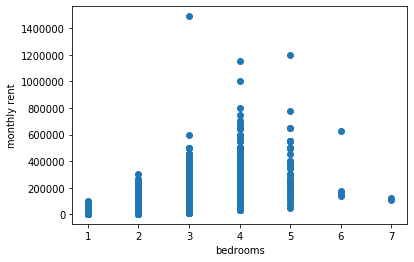

In [50]:
plt.scatter(data9['bedrooms'],data9['monthly rent'])
plt.xlabel('bedrooms')
plt.ylabel('monthly rent')
plt.show()

## Removing Outliers which seems to be unreal.

In [51]:
data9[(data9['monthly rent'] > 900000)]

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1381,other society,Residential Apartment,Lokhandwala,4,22000.0,Furnished,5 to 10 years old,10,15,1150000
1529,other society,Residential Apartment,Juhu,3,1500.0,Semifurnished,10+ years old,2,7,1490000
8176,other society,Residential Apartment,Prabhadevi,5,5500.0,Furnished,1 to 5 years old,30,41,1200000
10335,other society,Residential Apartment,other location,4,7300.0,Semifurnished,0 to 1 years old,16,20,1000000


In [52]:
data9.drop([1381, 1529, 8176, 10335], inplace = True)

In [53]:
data9[(data9['monthly rent'] > 900000)]

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent


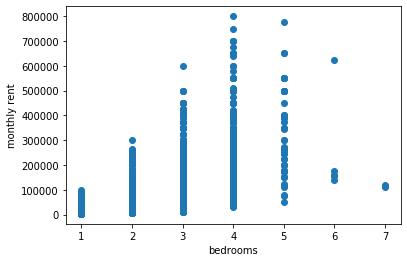

In [54]:
plt.scatter(data9['bedrooms'],data9['monthly rent'])
plt.xlabel('bedrooms')
plt.ylabel('monthly rent')
plt.show()

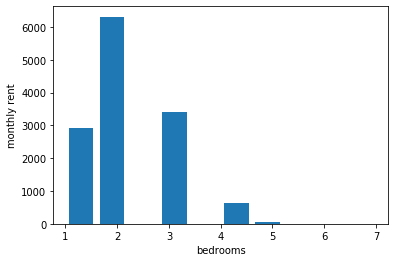

In [55]:
plt.hist(data9['bedrooms'], rwidth = .8)
plt.xlabel('bedrooms')
plt.ylabel('monthly rent')
plt.show()

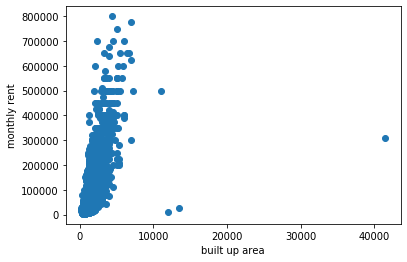

In [56]:
plt.scatter(data9['built-up area'], data9['monthly rent'])
plt.xlabel('built up area')
plt.ylabel('monthly rent')
plt.show()

## Removing Outliers which seems to be unreal.

In [57]:
built_area_outlier_index = data9[data9['built-up area']>10000].index
built_area_outlier_index

Int64Index([1646, 6478, 7883, 9030], dtype='int64')

In [58]:
data9.loc[built_area_outlier_index,:]

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
1646,other society,Independent House/Villa,other location,4,41548.6540,Semifurnished,0 to 1 years old,0,0,310000
6478,other society,Residential Apartment,other location,3,12000.0000,Furnished,5 to 10 years old,5,7,9000
7883,other society,Independent House/Villa,other location,4,11022.2336,Semifurnished,10+ years old,0,0,500000
9030,other society,Residential Apartment,other location,3,13454.8750,Unfurnished,5 to 10 years old,10,12,25000


In [59]:
data10 = data9.drop(built_area_outlier_index)

In [60]:
rent_outlier_index = data10[data10['monthly rent'] >= 1000000].index
rent_outlier_index

Int64Index([], dtype='int64')

In [61]:
data10.loc[rent_outlier_index,:]

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent


In [62]:
data11 = data10.drop(rent_outlier_index)

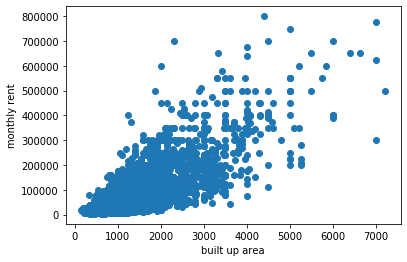

In [63]:
plt.scatter(data11['built-up area'], data11['monthly rent'])
plt.xlabel('built up area')
plt.ylabel('monthly rent')
plt.show()

In [64]:
data11.corr()['monthly rent']

bedrooms         0.577377
built-up area    0.725550
floor            0.364619
total floors     0.350862
monthly rent     1.000000
Name: monthly rent, dtype: float64

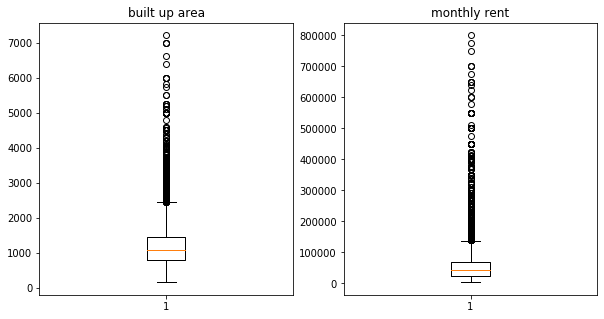

In [65]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].boxplot(data11['built-up area'])
ax[0].set_title('built up area')
ax[1].boxplot(data11['monthly rent'])
ax[1].set_title('monthly rent')
plt.show()

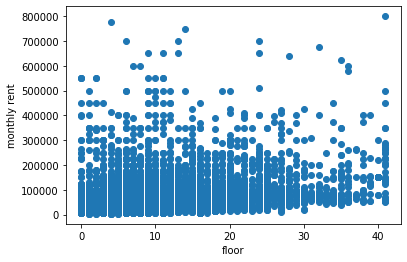

In [66]:
plt.scatter(data11['floor'], data11['monthly rent'])
plt.xlabel('floor')
plt.ylabel('monthly rent')
plt.show()

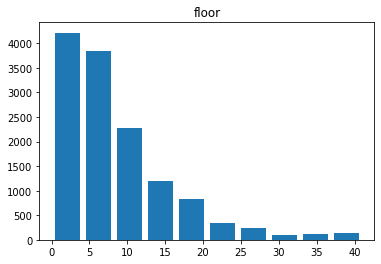

In [67]:
plt.hist(data11['floor'] ,rwidth = .8)
plt.title('floor')
plt.show()

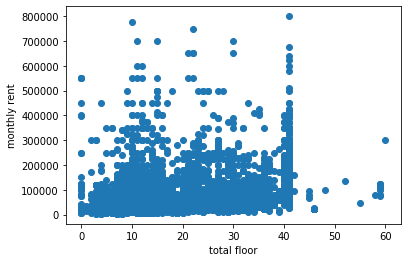

In [68]:
plt.scatter(data11['total floors'], data11['monthly rent'])
plt.xlabel('total floor')
plt.ylabel('monthly rent')
plt.show()

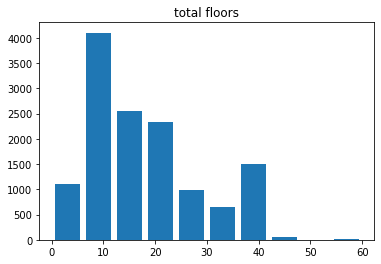

In [69]:
plt.hist(data11['total floors'] ,rwidth = .8)
plt.title('total floors')
plt.show()

In [70]:
data11.head()

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,85000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,32000
3,Crescent Bay,Residential Apartment,Parel,3,2275.0,Semifurnished,1 to 5 years old,40,41,150000
4,Ashwini CHS,Residential Apartment,Tilak Nagar,1,550.0,Semifurnished,5 to 10 years old,4,7,27000


In [71]:
data11.describe()

,bedrooms,built-up area,floor,total floors,monthly rent
count,13305.000000,13305.000000,13305.000000,13305.000000,13305.000000
mean,2.144607,1223.220128,8.907478,17.287636,60148.015333
std,0.827036,651.892862,7.406904,11.351893,64862.538445
min,1.000000,150.000000,0.000000,0.000000,2900.000000
25%,2.000000,785.000000,4.000000,7.000000,25000.000000
50%,2.000000,1070.000000,7.000000,15.000000,42000.000000
75%,3.000000,1450.000000,12.000000,23.000000,70000.000000
max,7.000000,7218.000000,41.000000,60.000000,800000.000000


 ## Exporting Cleaned Data locally.

In [72]:
data11.to_csv('mumbai_rent_cleaned_data.csv', index = False)

<a id = 's4'></a>
# <font color = Blue> 4. OneHotEncoding Text features. </font> 
<a href = '#top'>Back on Top</a>

In [73]:
society_dummies = pd.get_dummies(data11['society'])
society_dummies.drop('other society', axis =1, inplace = True)

In [74]:
type_dummies = pd.get_dummies(data11['type'])
type_dummies.head()

,Independent House/Villa,Residential Apartment,Studio Apartment
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [75]:
type_dummies.drop('Independent House/Villa', axis =1, inplace = True)

In [76]:
location_dummies = pd.get_dummies(data11['location'])
location_dummies.drop('other location', axis =1, inplace = True)

In [77]:
furnishing_dummies = pd.get_dummies(data11['furnishing'])
furnishing_dummies.head()

,Furnished,Semifurnished,Unfurnished
0,1,0,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [78]:
furnishing_dummies.drop('Unfurnished', axis =1, inplace = True)

In [79]:
age_dummies = pd.get_dummies(data11['age'])
age_dummies.head()

,0 to 1 years old,1 to 5 years old,10+ years old,5 to 10 years old
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [80]:
age_dummies.drop('0 to 1 years old', axis =1, inplace = True)

In [81]:
data11.head(3)

,society,type,location,bedrooms,built-up area,furnishing,age,floor,total floors,monthly rent
0,other society,Residential Apartment,Bandra (West),2,800.0,Furnished,5 to 10 years old,2,6,85000
1,other society,Residential Apartment,Khar West,2,1050.0,Furnished,1 to 5 years old,8,12,110000
2,Gajra Bhoomi Symphony,Residential Apartment,Sector-20 Koparkhairane,2,1050.0,Unfurnished,1 to 5 years old,14,17,32000


In [82]:
final_data = pd.concat([data11.drop(['society','type','location','furnishing','age'], axis =1),
                        society_dummies, type_dummies, location_dummies, furnishing_dummies, age_dummies], axis = 'columns')

In [83]:
final_data.head()

,bedrooms,built-up area,floor,total floors,monthly rent,Aaram Sty,Acme Ozone,Adityavardhan Apartment,Adonia Apartments,Ajmera Aeon,...,Wadala East,Waghbil,Worli,Worli Seaface,Yogidham,Furnished,Semifurnished,1 to 5 years old,10+ years old,5 to 10 years old
0,2,800.0,2,6,85000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,1050.0,8,12,110000,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2,1050.0,14,17,32000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,2275.0,40,41,150000,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,550.0,4,7,27000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id = 's5'></a>
# <font color = Blue> 5. Machine Learning Model Building. </font>
<a href = '#top'>Back on Top</a>

## Preparing Training and Testing Datasets

In [84]:
x = final_data.drop('monthly rent', axis = 1)
y = final_data['monthly rent']

In [85]:
x.shape

(13305, 356)

In [86]:
y.shape

(13305,)

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10644, 356)
(2661, 356)
(10644,)
(2661,)


## Scaling Datasets to convert them into same range.

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_train

array([[-0.1797809 , -0.62103542, -0.39213451, ..., -0.74757957,
        -0.4140925 ,  1.54346002],
       [ 1.03288571,  1.62300419,  2.29393265, ..., -0.74757957,
        -0.4140925 , -0.64789498],
       [-0.1797809 , -0.34342227, -0.92934795, ..., -0.74757957,
        -0.4140925 ,  1.54346002],
       ...,
       [ 1.03288571, -0.31257637, -0.52643787, ...,  1.33765024,
        -0.4140925 , -0.64789498],
       [-0.1797809 , -0.34342227, -1.06365131, ...,  1.33765024,
        -0.4140925 , -0.64789498],
       [-1.39244751, -1.11456991, -1.19795466, ..., -0.74757957,
         2.4149194 , -0.64789498]])

In [90]:
scaler.fit(x_test)
scaled_x_test = scaler.transform(x_test)
scaled_x_test

array([[-0.15548167, -0.47387889,  0.01954832, ..., -0.73479967,
        -0.41440381,  1.49969472],
       [-1.35125257, -0.71425707, -0.11843068, ...,  1.36091515,
        -0.41440381, -0.66680237],
       [ 1.04028922,  2.66606111,  1.3993383 , ...,  1.36091515,
        -0.41440381, -0.66680237],
       ...,
       [-0.15548167, -0.30861889, -0.67034667, ..., -0.73479967,
        -0.41440381, -0.66680237],
       [-0.15548167, -0.44383162,  0.57146431, ..., -0.73479967,
         2.41310524, -0.66680237],
       [-0.15548167, -0.06824071, -0.39438867, ...,  1.36091515,
        -0.41440381, -0.66680237]])

## Time to Built a ML model now 

## LinearRegression model with standard scaling.

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
standard_scaler_linear_model = LinearRegression()
standard_scaler_linear_model.fit(scaled_x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
standard_scaler_linear_y_pred = standard_scaler_linear_model.predict(scaled_x_test)

In [93]:
standard_scaler_linear_model.score(scaled_x_train, y_train)

0.826029253665806

In [94]:
standard_scaler_linear_model.score(scaled_x_test, y_test)

0.8299849691971595

In [95]:
r2_score(y_test, standard_scaler_linear_y_pred)

0.8299849691971595

## Lets store it in a DataFrame. so that we can compare different model's scores in last.

In [96]:
Final_Scores = pd.DataFrame( index = ['With Training Data', 'With Test Data'])


In [97]:
Final_Scores['Linear Regression (Standard Scaler) %'] = [standard_scaler_linear_model.score(scaled_x_train, y_train)*100, 
                                                         standard_scaler_linear_model.score(scaled_x_test, y_test)*100]

## LinearRegression model with Normalizing scaling

In [98]:
normalized_linear_model = LinearRegression( normalize = True)
normalized_linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [99]:
normalized_linear_y_pred = normalized_linear_model.predict(x_test)

In [100]:
normalized_linear_model.score(x_train, y_train)

0.8260308331250236

In [101]:
normalized_linear_model.score(x_test, y_test)

0.8385353577117213

In [102]:
r2_score(y_test, normalized_linear_y_pred)

0.8385353577117214

In [103]:
Final_Scores['Linear Regression (Normalization Scaler) %'] = [normalized_linear_model.score(x_train, y_train)*100, 
                                                              normalized_linear_model.score(x_test, y_test)*100]

##  Decision Tree Regressor model

In [104]:
from sklearn.tree import DecisionTreeRegressor
ssdtr_model = DecisionTreeRegressor()
ssdtr_model.fit( scaled_x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [105]:
ssdtr_y_pred = ssdtr_model.predict(scaled_x_test)

In [106]:
ssdtr_model.score(scaled_x_train, y_train)

0.9997743215801579

In [107]:
ssdtr_model.score(scaled_x_test, y_test)

0.6478339705789737

In [108]:
r2_score(y_test, ssdtr_y_pred)

0.6478339705789737

In [109]:
Final_Scores['Decision Tree Regressor %'] = [ssdtr_model.score(scaled_x_train, y_train)*100,
                                             ssdtr_model.score(scaled_x_test, y_test)*100]

## Random Forest Regressor model

In [110]:
from sklearn.ensemble import RandomForestRegressor
ssrfr_model = RandomForestRegressor()
ssrfr_model.fit(scaled_x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [111]:
ssrfr_y_pred = ssrfr_model.predict(scaled_x_test)

In [112]:
ssrfr_model.score(scaled_x_train, y_train)

0.9681975479538648

In [113]:
ssrfr_model.score(scaled_x_test, y_test)

0.8573054172471634

In [114]:
r2_score(y_test, ssrfr_y_pred)

0.8573054172471632

In [115]:
Final_Scores['Random Forest Regressor %'] = [ssrfr_model.score(scaled_x_train, y_train)*100,
                                             ssrfr_model.score(scaled_x_test, y_test)*100]

<a id = 's6'></a>
# <font color = Red> Finally Lets Compare Scores now </font>

In [116]:
Final_Scores

,Linear Regression (Standard Scaler) %,Linear Regression (Normalization Scaler) %,Decision Tree Regressor %,Random Forest Regressor %
With Training Data,82.602925,82.603083,99.977432,96.819755
With Test Data,82.998497,83.853536,64.783397,85.730542


# <font color = Green> So,We Deploy Random Forest Regressor model to predict Monthly Rent with highest accuracy.</font>

## Created by: Gaurav 
<a href = '#top'>Back on Top</a>

<a href = 'https://github.com/G0rav'> Github Link</a>